In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers,regularizers
import tensorflow

In [3]:
#loading the dataset
data = pd.read_csv("CC_Default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Check total number of observations and variables
data.shape

(30000, 25)

In [5]:
#Check for missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

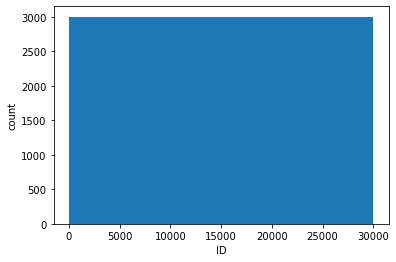

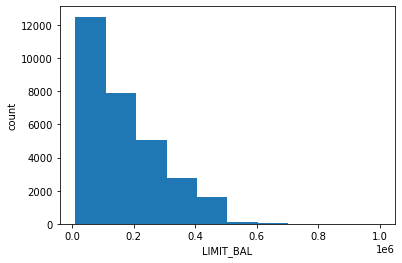

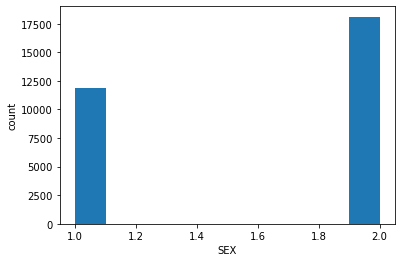

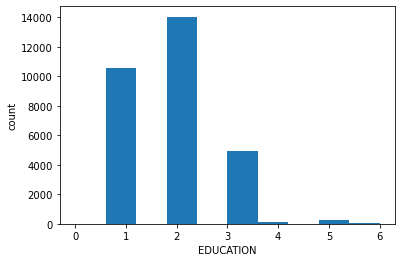

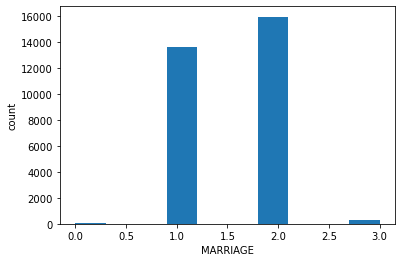

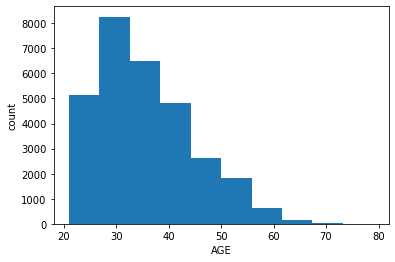

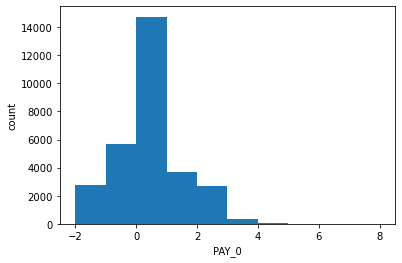

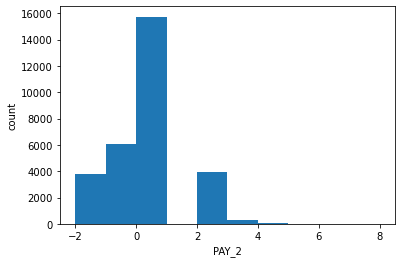

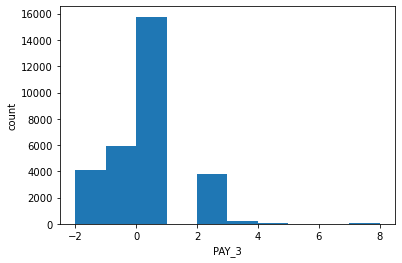

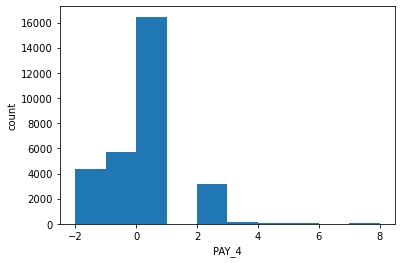

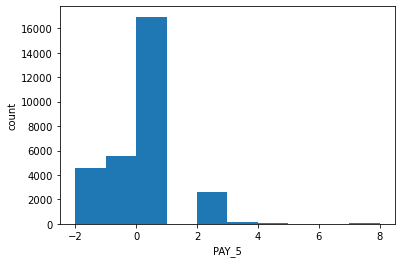

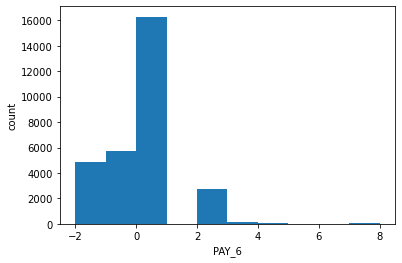

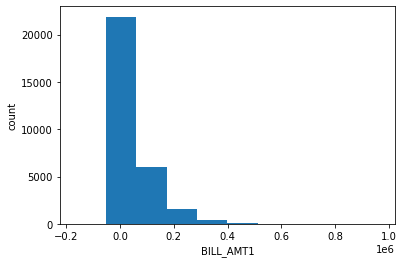

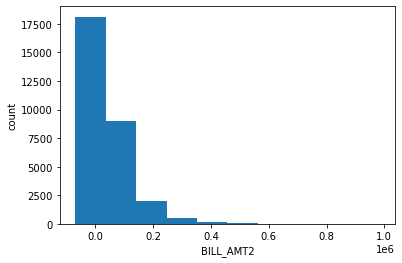

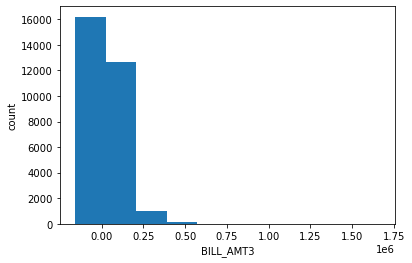

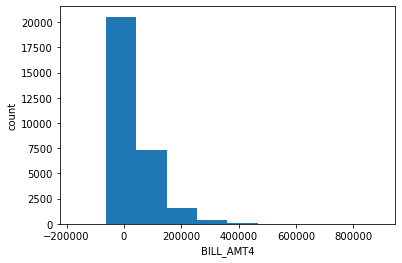

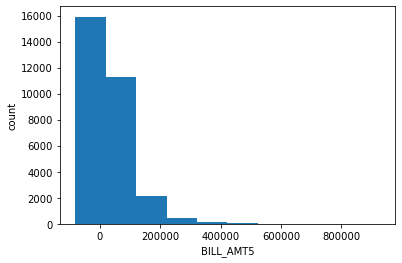

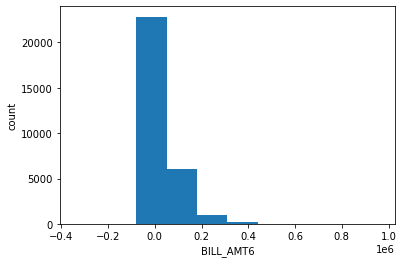

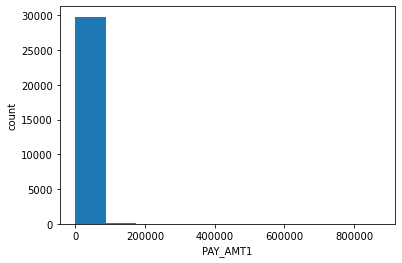

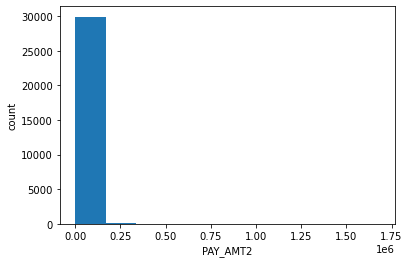

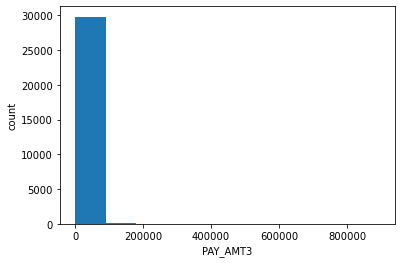

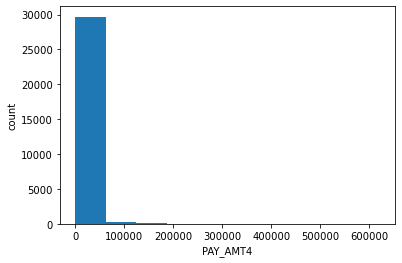

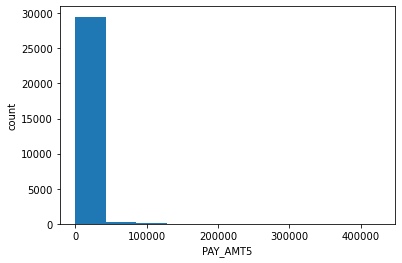

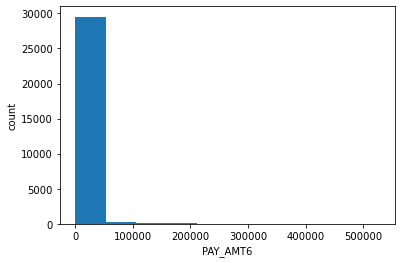

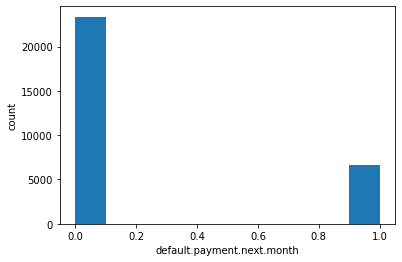

In [6]:
#Plot histogram for univariate distribution of numerical data
num_cols = data.select_dtypes(include = np.number).columns.tolist()
for col in num_cols:
    data[col].hist(grid=False)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


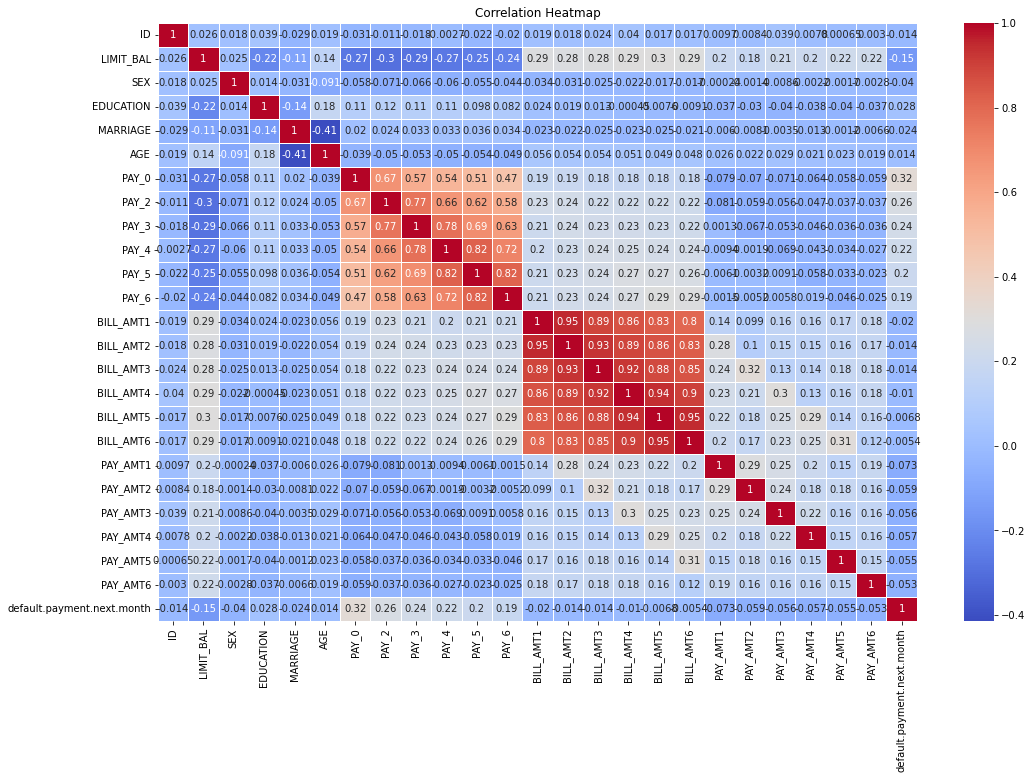

In [7]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1.It is observed that the PAY_0-PAY_6 variables and BILL_AMOUNT_1 - BILL_AMOUNT_6 variables are positively correlated.MARRIAGE and AGE variables are negatively correlated. This might cause multicollinearity. 
2.BILL_AMOUNT_X variables is minimally correlated compared to PAY_X variables to the target variable(default.payment.next.month). AGE variable is more correlated to target variable than the MARRIAGE variable.


In [8]:
#import "Train.csv" dataset
train_data = pd.read_csv("Train.csv")
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         26000 non-null  int64  
 1   LIMIT_BAL  26000 non-null  int64  
 2   SEX        26000 non-null  int64  
 3   EDUCATION  26000 non-null  int64  
 4   MARRIAGE   26000 non-null  int64  
 5   AGE        26000 non-null  int64  
 6   PAY_0      26000 non-null  int64  
 7   PAY_2      26000 non-null  int64  
 8   PAY_3      26000 non-null  int64  
 9   PAY_4      26000 non-null  int64  
 10  PAY_5      26000 non-null  int64  
 11  PAY_6      26000 non-null  int64  
 12  BILL_AMT1  26000 non-null  int64  
 13  BILL_AMT2  26000 non-null  float64
 14  BILL_AMT3  26000 non-null  float64
 15  BILL_AMT4  26000 non-null  float64
 16  BILL_AMT5  26000 non-null  float64
 17  BILL_AMT6  26000 non-null  float64
 18  PAY_AMT1   26000 non-null  float64
 19  PAY_AMT2   26000 non-null  float64
 20  PAY_AM

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [9]:
train_data.SEX = train_data.SEX.astype("category")
train_data.EDUCATION = train_data.EDUCATION.astype("category")
train_data.MARRIAGE = train_data.MARRIAGE.astype("category")
train_data.PAY_0 = train_data.PAY_0.astype("category")
train_data.PAY_2 = train_data.PAY_2.astype("category")
train_data.PAY_3 = train_data.PAY_3.astype("category")
train_data.PAY_4 = train_data.PAY_4.astype("category")
train_data.PAY_5 = train_data.PAY_5.astype("category")
train_data.PAY_6 = train_data.PAY_6.astype("category")
train_data.Default = train_data.Default.astype("category")

'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'MARRIAGE' are the varibles dropped from the dataset

In [10]:
#Dropping the variables that cause multicollinearity
train_data_2 = train_data
train_data_2.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'MARRIAGE'], axis =1, inplace = True)
train_data_2

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,37,0,0,0,0,0,0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,29,0,0,0,0,0,0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,29997,150000,1,3,43,-1,-1,-1,-1,0,0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
25996,29998,30000,1,2,37,4,3,2,-1,0,0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
25997,29999,80000,1,3,41,1,-1,0,0,0,-1,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
25998,30000,50000,1,2,46,0,0,0,0,0,0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [11]:
#Splitting independent and dependent variables

X_train = train_data_2.drop("Default", axis =1)
y_train = train_data_2["Default"]

In [12]:
#Importing "test.csv"
test_data = pd.read_csv("Test.csv")
test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,2,26,0,0,2,0,...,125046,46364.0,83460,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,2,31,1,-2,-2,-2,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,2,32,2,2,2,0,...,123954,131543.0,134319,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,2,21,-2,-2,-2,-2,...,4311,1551.0,0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,2,23,2,2,2,0,...,18013,19315.0,19859,2850,0.0,1400.0,1600.0,1000.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,19843,250000,2,1,1,40,2,2,2,0,...,181147,184784.0,195574,13926,0.0,6408.0,6478.0,13629.0,0.0,0
3996,29873,230000,1,2,1,41,0,0,0,0,...,228653,225471.0,224853,10000,10500.0,10000.0,9000.0,8200.0,9000.0,0
3997,6294,280000,1,1,1,55,-1,-1,0,0,...,4707,2254.0,5375,4917,2453.0,2254.0,0.0,5375.0,1165.0,0
3998,5229,320000,2,3,2,53,-1,-1,-1,-1,...,12610,23942.0,34183,3479,3479.0,12610.0,15000.0,14184.0,16826.0,1


In [13]:
#Converting relevant variables to categorical variables
test_data.SEX = test_data.SEX.astype("category")
test_data.EDUCATION = test_data.EDUCATION.astype("category")
test_data.MARRIAGE = test_data.MARRIAGE.astype("category")
test_data.PAY_0 = test_data.PAY_0.astype("category")
test_data.PAY_2 = test_data.PAY_2.astype("category")
test_data.PAY_3 = test_data.PAY_3.astype("category")
test_data.PAY_4 =test_data.PAY_4.astype("category")
test_data.PAY_5 = test_data.PAY_5.astype("category")
test_data.PAY_6 = test_data.PAY_6.astype("category")
test_data.Default = test_data.Default.astype("category")

In [14]:
#Dropping the variables from test data that can cause muliticollinearity
test_data_2 = test_data
test_data_2.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'MARRIAGE'], axis =1, inplace = True)
test_data_2

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,26,0,0,2,0,0,-1,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,31,1,-2,-2,-2,-2,-2,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,32,2,2,2,0,0,2,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,21,-2,-2,-2,-2,-2,-2,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,23,2,2,2,0,0,2,2850,0.0,1400.0,1600.0,1000.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,19843,250000,2,1,40,2,2,2,0,0,0,13926,0.0,6408.0,6478.0,13629.0,0.0,0
3996,29873,230000,1,2,41,0,0,0,0,0,0,10000,10500.0,10000.0,9000.0,8200.0,9000.0,0
3997,6294,280000,1,1,55,-1,-1,0,0,2,-1,4917,2453.0,2254.0,0.0,5375.0,1165.0,0
3998,5229,320000,2,3,53,-1,-1,-1,-1,0,0,3479,3479.0,12610.0,15000.0,14184.0,16826.0,1


In [15]:
#Splitting the independent and dependent variable
X_test = test_data_2.drop("Default", axis =1)
y_test = test_data_2["Default"]

Logistic Regression:

In [36]:
#Fit the model on the train
model_logistic = LogisticRegression(penalty = 'l2', solver = "newton-cg", class_weight = 'balanced')
model_logistic.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', solver='newton-cg')

In [17]:
#Predict the target variable
y_predict_logistic = model_logistic.predict(X_test)
y_predict_train = model_logistic.predict(X_train)

<AxesSubplot:>

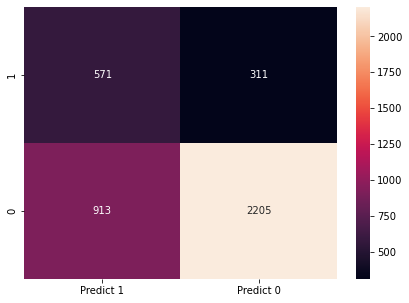

In [18]:
#Plotting confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict_logistic, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [19]:
print(metrics.classification_report(y_test, y_predict_logistic))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      3118
           1       0.38      0.65      0.48       882

    accuracy                           0.69      4000
   macro avg       0.63      0.68      0.63      4000
weighted avg       0.77      0.69      0.72      4000



Precision: 0.38 F1 score: 0.48 accuracy : 0.69

Random forest model:

In [20]:
#Fit the model and predict the target variable
model_random = RandomForestClassifier(n_estimators = 1500, max_depth = 3 ,max_features=3,random_state=1)
model_random.fit(X_train, y_train)
y_predict_random = model_random.predict(X_test)

<AxesSubplot:>

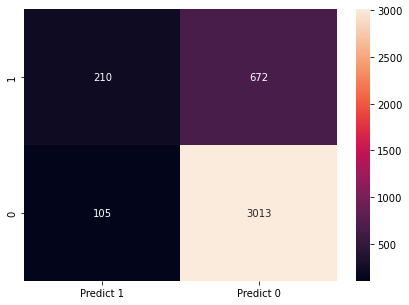

In [21]:
#Plotting confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict_random, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [22]:
print(metrics.classification_report(y_test, y_predict_random))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3118
           1       0.67      0.24      0.35       882

    accuracy                           0.81      4000
   macro avg       0.74      0.60      0.62      4000
weighted avg       0.78      0.81      0.77      4000



precision: 0.67 f1 score: 0.35 accuracy: 0.81

In [23]:
#Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


SVM Classifier:

In [24]:
model_svm = svm.SVC(gamma=0.025, C=3)

In [25]:
model_svm.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [26]:
y_predict_svm = model_svm.predict(X_test)

<AxesSubplot:>

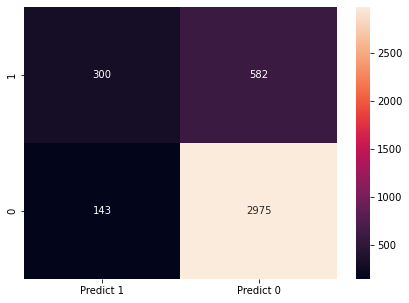

In [27]:
#Plotting confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict_svm, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [28]:
print(metrics.classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3118
           1       0.68      0.34      0.45       882

    accuracy                           0.82      4000
   macro avg       0.76      0.65      0.67      4000
weighted avg       0.80      0.82      0.79      4000



precision: 0.68 f1-score: 0.45 accuracy:0.82

ANN Model:

In [29]:
#Create the model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
model_ann = baseline_model()
model_ann.fit(X_train, y_train, epochs=100 , verbose=1 , batch_size=15)

Epoch 1/100
1734/1734 [==============================] - 10s 4ms/step - loss: 0.4734 - accuracy: 0.7887
Epoch 2/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4494 - accuracy: 0.8167
Epoch 3/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4455 - accuracy: 0.8173
Epoch 4/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4412 - accuracy: 0.8190
Epoch 5/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4380 - accuracy: 0.8194
Epoch 6/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4358 - accuracy: 0.8200
Epoch 7/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4344 - accuracy: 0.8210
Epoch 8/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4337 - accuracy: 0.8205
Epoch 9/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4327 - accuracy: 0.8213
Epoch 10/100
1734/1734 [==============================] - 7s 4ms/step - 

1734/1734 [==============================] - 8s 4ms/step - loss: 0.4240 - accuracy: 0.8242
Epoch 80/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4239 - accuracy: 0.8244
Epoch 81/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4239 - accuracy: 0.8242
Epoch 82/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4240 - accuracy: 0.8241
Epoch 83/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4236 - accuracy: 0.8243
Epoch 84/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4237 - accuracy: 0.8245
Epoch 85/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4234 - accuracy: 0.8242
Epoch 86/100
1734/1734 [==============================] - 7s 4ms/step - loss: 0.4236 - accuracy: 0.8242
Epoch 87/100
1734/1734 [==============================] - 8s 4ms/step - loss: 0.4233 - accuracy: 0.8237
Epoch 88/100
1734/1734 [==============================] - 7s 4ms/step - loss:

In [31]:
y_predict_ann = model_ann.predict(X_test, verbose=1)

125/125 [==============================] - 1s 3ms/step


In [32]:
y_predict_ann = np.round(y_predict_ann)

<AxesSubplot:>

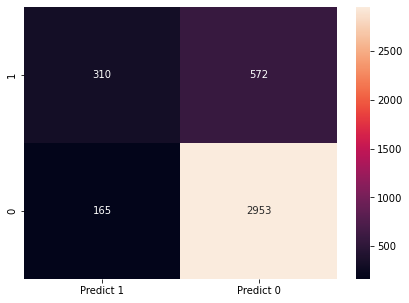

In [34]:
#Plotting confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict_ann, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [33]:
print(metrics.classification_report(y_test, y_predict_ann))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3118
           1       0.65      0.35      0.46       882

    accuracy                           0.82      4000
   macro avg       0.75      0.65      0.67      4000
weighted avg       0.80      0.82      0.79      4000



precision: 0.65 f1 score: 0.46 accuracy: 0.82

The F1 score for the models ranging from 0.45-0.48 except random forest classifier which is 0.35.
The accuracy for the models ranging from 0.81 -0.82 except logistic regressor model which is 0.69
The precision for the models ranging from 0.65 -0.68 except logistic regressor model which is 0.38.
SVM model takes longer running time compared to other models.
The accuracy and precision for logistic regressor is quite low compared to other models.
the F1 score is low for random forest model.
Considering the above pointers, ANN  model would better option for credit card analysis.